In [10]:
import pandas
data=pandas.read_csv('Datasets/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [11]:
data.isnull().sum()

CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [14]:
array=data.values
x=array[:,2:5]
x

array([[19, 15.0, 39.0],
       [21, 15.0, 81.0],
       [20, 16.0, 6.0],
       [23, 16.0, 77.0],
       [31, 17.0, 40.0],
       [22, 17.0, 76.0],
       [35, 18.0, 6.0],
       [23, 18.0, 94.0],
       [64, 19.0, 3.0],
       [30, 19.0, 72.0],
       [67, 19.0, 14.0],
       [35, 19.0, 99.0],
       [58, 20.0, 15.0],
       [24, 20.0, 77.0],
       [37, 20.0, 13.0],
       [22, 20.0, 79.0],
       [35, 21.0, 35.0],
       [20, 21.0, 66.0],
       [52, 23.0, 29.0],
       [35, 23.0, 98.0],
       [35, 24.0, 35.0],
       [25, 24.0, 73.0],
       [46, 25.0, 5.0],
       [31, 25.0, 73.0],
       [54, 28.0, 14.0],
       [29, 28.0, 82.0],
       [45, 28.0, 32.0],
       [35, 28.0, 61.0],
       [40, 29.0, 31.0],
       [23, 29.0, 87.0],
       [60, 30.0, 4.0],
       [21, 30.0, 73.0],
       [53, 33.0, 4.0],
       [18, 33.0, 92.0],
       [49, 33.0, 14.0],
       [21, 33.0, 81.0],
       [42, 34.0, 17.0],
       [30, 34.0, 73.0],
       [36, 37.0, 26.0],
       [20, 37.0, 75.0],
      

# Elbow Method-Optional
Additional content

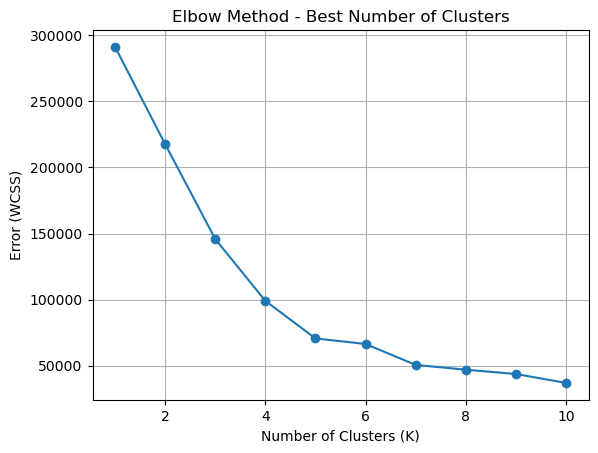

In [ ]:

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

# Create an empty list to store the "error" for each number of clusters
# wcss stands for Within-Cluster Sum of Squares (also called inertia).

wcss = []

# Try making 1 to 10 clusters
for k in range(1, 11):
    # Create a KMeans model with k clusters
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x)  # Train the model on your data
    wcss.append(model.inertia_)  # Save how spread out the clusters are (WCSS)

# Draw a line graph to see where the "elbow" happens
plt.plot(range(1, 11), wcss, marker='o')  # Show dots on the line
plt.title('Elbow Method - Best Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Error (WCSS)')
plt.grid(True)
plt.show()



In [23]:
import sklearn
# K-Means groups things into K clusters based on similarity. It guesses the groups, refines them, and stops when the groups make sense.
# It’s an algorithm that groups data points into a number of clusters
from sklearn.cluster import KMeans
model=KMeans(n_clusters=10, random_state=42)
model.fit(x)

KMeans(n_clusters=10, random_state=42)

In [24]:
# Stores the coordinates (values) of each cluster's center
means=model.cluster_centers_
# Lets check the groups created in tabular manner
clusters=pandas.DataFrame(means, columns=['Age','Anual_Income', 'SpendingScore'])
clusters

,Age,Anual_Income,SpendingScore
0,42.384615,47.307692,46.730769
1,32.580645,80.451613,82.709677
2,43.750000,106.500000,19.875000
3,25.272727,25.727273,79.363636
4,51.416667,25.166667,11.500000
5,25.000000,60.370370,48.777778
6,60.206897,55.896552,50.413793
7,41.173913,79.130435,15.391304
8,32.625000,23.375000,30.500000
9,33.833333,117.000000,80.166667


In [25]:
# Let see who is in group 2



data['no']  = model.labels_   # get every record group number
cluster5 =  data[data['no'] == 2]
cluster5


,CustomerID,Gender,Age,Annual Income,Spending Score,no
178,179,Male,59,93.0,14.0,2
180,181,Female,37,97.0,32.0,2
182,183,Male,46,98.0,15.0,2
186,187,Female,54,101.0,24.0,2
188,189,Female,41,103.0,17.0,2
190,191,Female,34,103.0,23.0,2
194,195,Female,47,120.0,16.0,2
198,199,Male,32,137.0,18.0,2


# Silhouette Score
The Silhouette Score tells you how well each point fits into its cluster compared to other clusters.
Above 0.5 → Generally good

0.25 to 0.5 → Might be okay

Below 0.25 → Probably not great



In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, model.labels_)
score

0.3655419114938126

In [21]:
data[data['no'] == 5].to_csv('Cluster5.csv')